<a href="https://colab.research.google.com/github/etomiwa80-afk/STAT-7220-Applied-Experimental-Design/blob/assignment1/Copy_of_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: September 12, 2025**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment



**Question 2.** Specify the outcome variable


**Question 3.** Specify the independent variable. What are some possible lurking variables?

**Question 4.** Briefly explain why a completely randomized design is appropriate for this experiment.

**Question 5.** State the null and alternative hypotheses for this experiment.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses.

# 🍺 IPA Brewing Experiment Analysis
Emmanuel Faola

**Due:** September 12, 2025

---
## **Question 1.** Briefly define the objective of this experiment

The objective of this experiment is to determine whether aging time
(3, 4, or 5 weeks) has a significant effect on the bitterness of an
experimental India Pale Ale (IPA), as measured by International
Bitterness Units (IBUs).

## **Question 2.** Specify the outcome variable
\
OUTCOME VARIABLE: International Bitterness Units (IBUs)

Characteristics:
- Type: Continuous, quantitative variable
- Measurement method: Spectrophotometer
- Scale: Ratio scale (has true zero)
- Units: IBUs (International Bitterness Units)
- Expected range: Typically 20-80 IBUs for IPAs
""")

---
## **Question 3.** Specify the independent variable. What are some possible lurking variables?
---

A Completely Randomized Design (CRD) is appropriate because:

1. RANDOM ASSIGNMENT: Aging tanks were randomly assigned to treatments,
   ensuring confounding variables are equally distributed.

2. HOMOGENEOUS UNITS: All bottles from same batch minimize initial variation.

3. SINGLE FACTOR: Testing only one factor (aging time) with three levels.

4. ADEQUATE SAMPLE SIZE: n=10 per group provides sufficient power.

5. CONTROLLED CONDITIONS: Same brewing, storage, and measurement procedures.

6. NO BLOCKING NEEDED: No obvious systematic variation sources requiring blocks.

7. INDEPENDENCE: Each bottle's IBU measurement is independent of others.


---
## **Question 4.** Briefly explain why a completely randomized design is appropriate for this experiment.
---


In [ ]:
# Question 4 - Code Cell Version
print("QUESTION 4: Why Completely Randomized Design is Appropriate")
print("-" * 55)
print("""
A Completely Randomized Design (CRD) is appropriate because:

1. RANDOM ASSIGNMENT: Aging tanks were randomly assigned to treatments,
   ensuring confounding variables are equally distributed.

2. HOMOGENEOUS UNITS: All bottles from same batch minimize initial variation.

3. SINGLE FACTOR: Testing only one factor (aging time) with three levels.

4. ADEQUATE SAMPLE SIZE: n=10 per group provides sufficient power.

5. CONTROLLED CONDITIONS: Same brewing, storage, and measurement procedures.

6. NO BLOCKING NEEDED: No obvious systematic variation sources requiring blocks.

7. INDEPENDENCE: Each bottle's IBU measurement is independent of others.
""")

QUESTION 4: Why Completely Randomized Design is Appropriate
-------------------------------------------------------

A Completely Randomized Design (CRD) is appropriate because:

1. RANDOM ASSIGNMENT: Aging tanks were randomly assigned to treatments,
   ensuring confounding variables are equally distributed.

2. HOMOGENEOUS UNITS: All bottles from same batch minimize initial variation.

3. SINGLE FACTOR: Testing only one factor (aging time) with three levels.

4. ADEQUATE SAMPLE SIZE: n=10 per group provides sufficient power.

5. CONTROLLED CONDITIONS: Same brewing, storage, and measurement procedures.

6. NO BLOCKING NEEDED: No obvious systematic variation sources requiring blocks.

7. INDEPENDENCE: Each bottle's IBU measurement is independent of others.



---
## **Question 5.** State the null and alternative hypotheses for this experiment.
---

In [ ]:

# Question 5 - Code Cell Version
print("QUESTION 5: Null and Alternative Hypotheses")
print("-" * 45)
print("""
NULL HYPOTHESIS (H₀): μ₃ = μ₄ = μ₅
The mean IBU levels are equal across all three aging times.

ALTERNATIVE HYPOTHESIS (H₁): At least one μᵢ ≠ μⱼ (i ≠ j)
At least one aging time produces a significantly different mean IBU level.

Where:
- μ₃ = population mean IBU for 3-week aging
- μ₄ = population mean IBU for 4-week aging
- μ₅ = population mean IBU for 5-week aging

Statistical Test: One-way ANOVA
Significance Level: α = 0.05
""")

QUESTION 5: Null and Alternative Hypotheses
---------------------------------------------

NULL HYPOTHESIS (H₀): μ₃ = μ₄ = μ₅
The mean IBU levels are equal across all three aging times.

ALTERNATIVE HYPOTHESIS (H₁): At least one μᵢ ≠ μⱼ (i ≠ j)
At least one aging time produces a significantly different mean IBU level.

Where:
- μ₃ = population mean IBU for 3-week aging
- μ₄ = population mean IBU for 4-week aging  
- μ₅ = population mean IBU for 5-week aging

Statistical Test: One-way ANOVA
Significance Level: α = 0.05



---
## **Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?
---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, levene, shapiro, bartlett
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('/IPA (1).xlsx')
print("Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

Data loaded successfully!
Shape: (30, 2)
Columns: ['Weeks', 'IBU']

First 5 rows:
     Weeks    IBU
0  3 Weeks  51.71
1  3 Weeks  43.53
2  3 Weeks  47.25
3  3 Weeks  41.57
4  3 Weeks  46.27


Summary Statistics by Aging Time:


,count,mean,std,min,25%,50%,75%,max
Weeks,,,,,,,,
3 Weeks,10.0,45.657,5.548563,39.04,42.0600,44.255,47.005,57.75
4 Weeks,10.0,60.164,10.390411,44.56,55.5325,60.940,64.625,81.99
5 Weeks,10.0,71.791,12.627946,48.93,63.0475,71.465,81.100,90.32


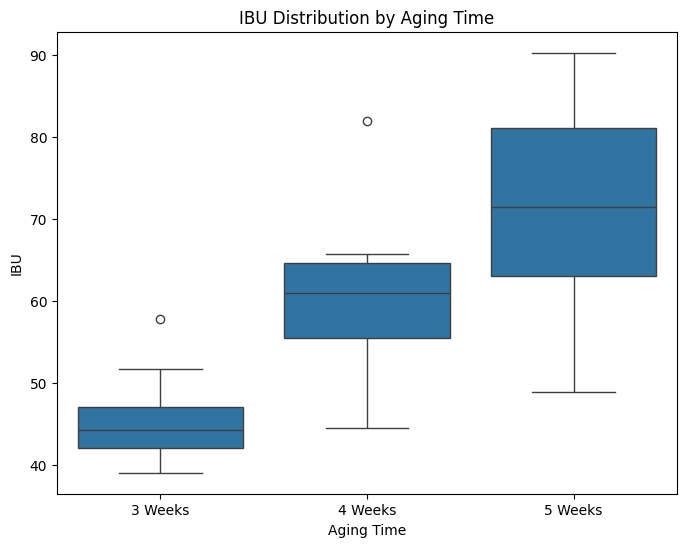

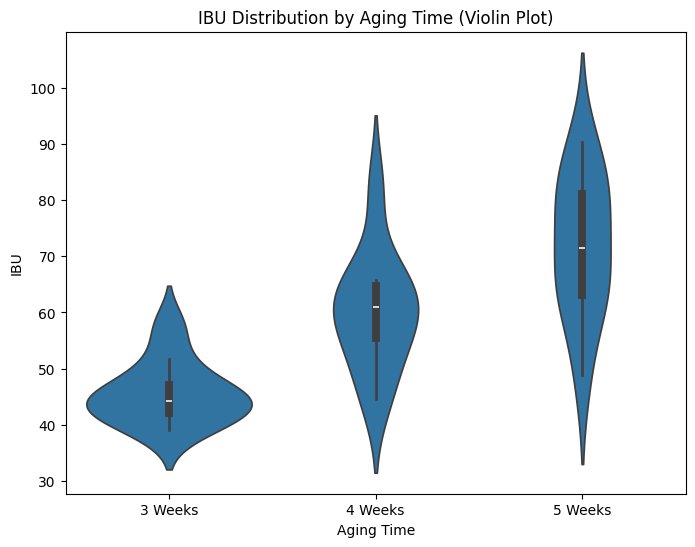

In [ ]:
# Summary Statistics
print("Summary Statistics by Aging Time:")
display(df.groupby('Weeks')['IBU'].describe())

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Weeks', y='IBU', data=df, order=['3 Weeks', '4 Weeks', '5 Weeks'])
plt.title('IBU Distribution by Aging Time')
plt.xlabel('Aging Time')
plt.ylabel('IBU')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Weeks', y='IBU', data=df, order=['3 Weeks', '4 Weeks', '5 Weeks'])
plt.title('IBU Distribution by Aging Time (Violin Plot)')
plt.xlabel('Aging Time')
plt.ylabel('IBU')
plt.show()

**Interpretation of Exploratory Analysis (Question 6):**

Based on the summary statistics and visualizations (box plot and violin plot):

*   **Mean IBUs:** There is a clear trend of increasing mean IBUs with longer aging times. The mean IBU for 3 weeks is approximately 45.7, for 4 weeks is approximately 60.2, and for 5 weeks is approximately 71.8. These means appear distinctly different from each other.
*   **Distribution and Spread:** The box plots and violin plots show that the distributions of IBUs for each aging time are somewhat separated, with increasing median and spread as aging time increases. The 5-week aging time shows a wider spread of IBU values compared to 3 and 4 weeks.
*   **Outliers:** There appears to be one potential outlier in the 3-week group and one in the 4-week group, although these will be further assessed during assumption testing.

**Conclusion for Question 6:**

The exploratory analysis, particularly the noticeable differences in the mean IBU values and the separation of the distributions across the three aging times, **more strongly supports the alternative hypothesis (H₁)**. The alternative hypothesis states that at least one aging time produces a significantly different mean IBU level. The observed differences in the exploratory analysis suggest that aging time likely has an effect on the bitterness of the IPA.

In [ ]:
print("QUESTION 7: One-Way ANOVA Model and Normality Testing")
print("-" * 55)

print("Building One-Way ANOVA Model...")
groups = []
group_names = []
for name in df[df.columns[0]].unique():
    group_data = df[df[df.columns[0]] == name]['IBU']
    groups.append(group_data)
    group_names.append(name)

print(f"✓ Groups created: {group_names}")
print(f"✓ Sample sizes: {[len(group) for group in groups]}")

print("\nNORMALITY ASSUMPTION TESTING:")
print("=" * 40)


print(f"✓ Groups created: {group_names}")
print(f"✓ Sample sizes: {[len(group) for group in groups]}")

print("\nNORMALITY ASSUMPTION TESTING:")
print("=" * 40)

print("VISUAL METHOD 1 - Q-Q Plots:")
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
colors = ['red', 'blue', 'green']

for i, (group_data, name) in enumerate(zip(groups, group_names)):
    stats.probplot(group_data, dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot: {name}')
    axes[i].get_lines()[0].set_color(colors[i])
    axes[i].get_lines()[1].set_color(colors[i])

plt.tight_layout()
plt.show()


print("\nVISUAL METHOD 2 - Histograms with Normal Curves:")
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, (group_data, name) in enumerate(zip(groups, group_names)):
    # Histogram
    axes[i].hist(group_data, bins=6, density=True, alpha=0.7,
                color=colors[i], label='Data')

      normal_curve = stats.norm.pdf(x, group_data.mean(), group_data.std())
    axes[i].plot(x, normal_curve, 'k-', linewidth=2, label='Normal')

    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('IBUs')
    axes[i].legend()

plt.tight_layout()
plt.show()


IndentationError: unexpected indent (ipython-input-3080793806.py, line 47)

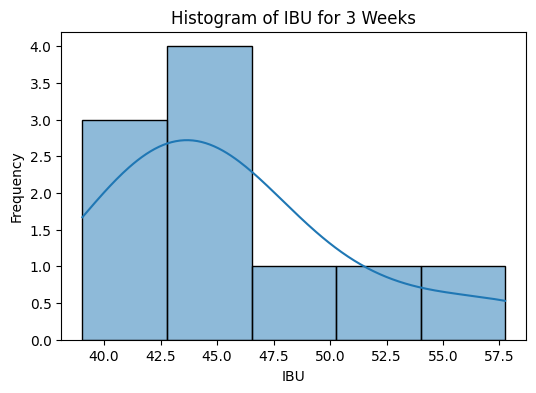

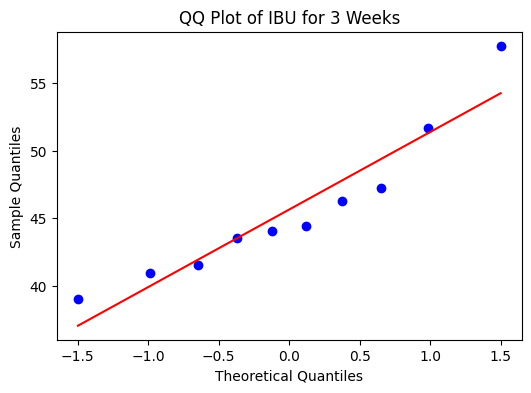

Group: 3 Weeks
  Shapiro-Wilk Statistic: 0.9065
  P-value: 0.2578
  Result: Data for 3 Weeks looks approximately normally distributed (p > 0.05).


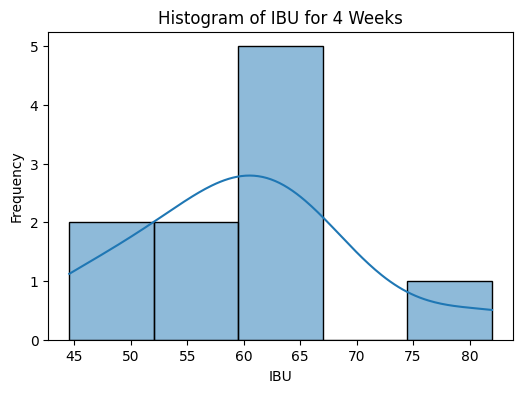

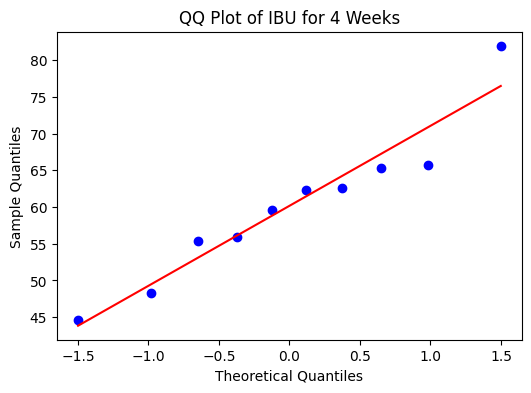

Group: 4 Weeks
  Shapiro-Wilk Statistic: 0.9446
  P-value: 0.6056
  Result: Data for 4 Weeks looks approximately normally distributed (p > 0.05).


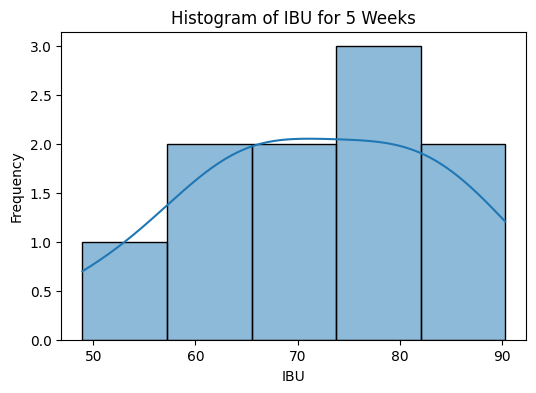

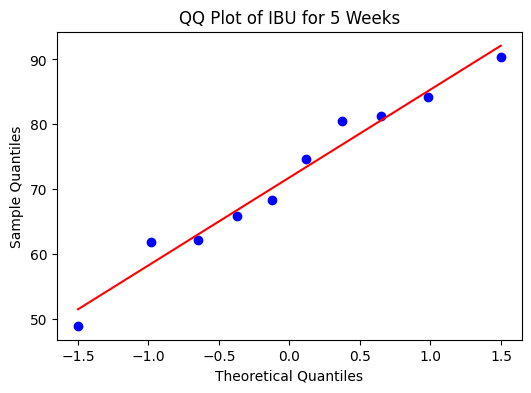

Group: 5 Weeks
  Shapiro-Wilk Statistic: 0.9684
  P-value: 0.8761
  Result: Data for 5 Weeks looks approximately normally distributed (p > 0.05).


In [ ]:
# Visual Method: Histograms and QQ Plots

for i, group in enumerate(groups):
    group_name = group_names[i]

    # Histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(group, kde=True)
    plt.title(f'Histogram of IBU for {group_name}')
    plt.xlabel('IBU')
    plt.ylabel('Frequency')
    plt.show()

    # QQ Plot
    plt.figure(figsize=(6, 4))
    stats.probplot(group, dist="norm", plot=plt)
    plt.title(f'QQ Plot of IBU for {group_name}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()

    # Statistical Method: Shapiro-Wilk Test
    stat, p_value = shapiro(group)
    print(f"Group: {group_name}")
    print(f"  Shapiro-Wilk Statistic: {stat:.4f}")
    print(f"  P-value: {p_value:.4f}")

    if p_value > alpha:
        print(f"  Result: Data for {group_name} looks approximately normally distributed (p > {alpha}).")
    else:
        print(f"  Result: Data for {group_name} does not look normally distributed (p <= {alpha}).")


QUESTION 8: Homogeneity of Variance Testing
---------------------------------------------


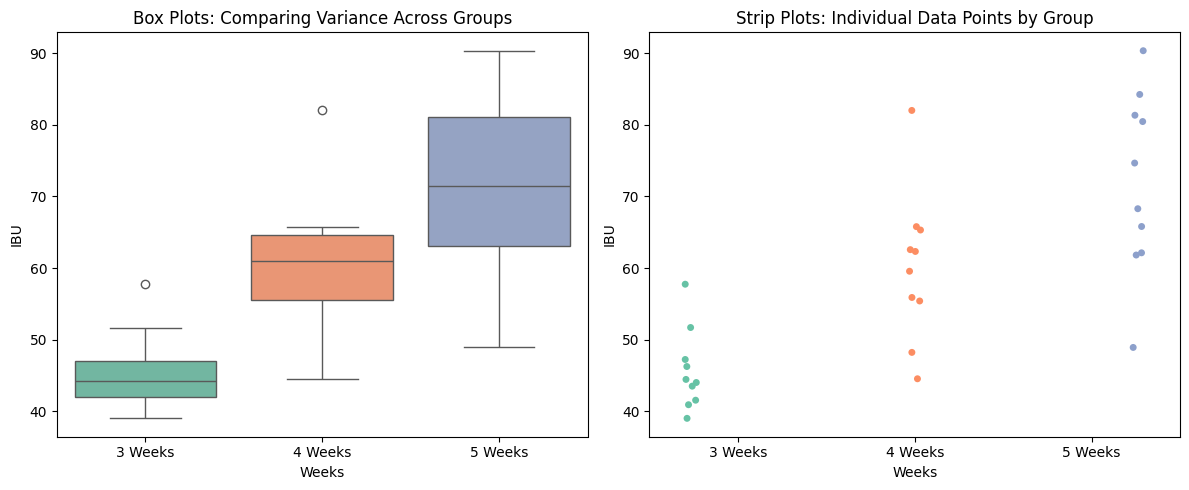

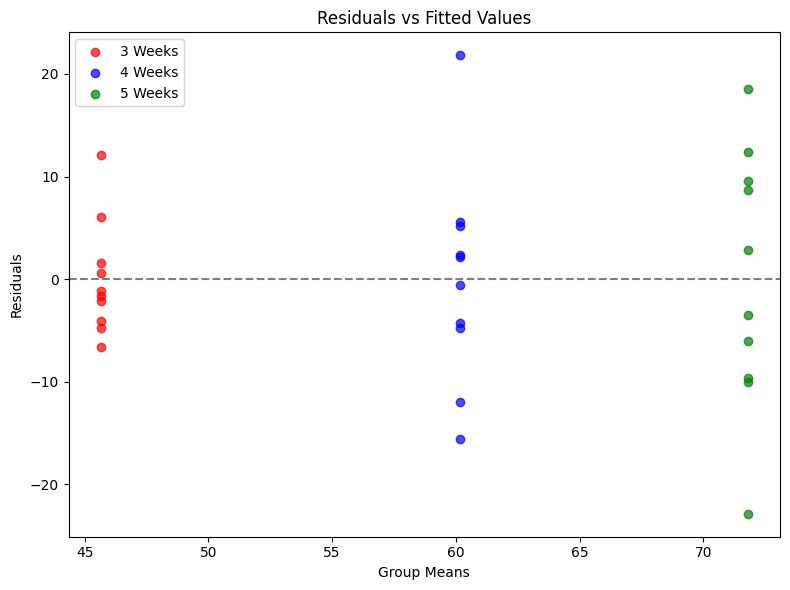

VARIANCE STATISTICS:
-------------------------
3 Weeks: Variance = 30.7866, Std Dev = 5.5486
4 Weeks: Variance = 107.9606, Std Dev = 10.3904
5 Weeks: Variance = 159.4650, Std Dev = 12.6279

Variance Ratio (max/min): 5.180
Rule of thumb: Ratio should be < 4.0

STATISTICAL TESTS:
-------------------------
Levene's Test:
  Levene's Statistic: 3.1377
  P-value: 0.0595

Bartlett's Test:
  Bartlett's Statistic: 5.2909
  P-value: 0.0710

HOMOGENEITY ASSESSMENT CONCLUSION:
------------------------------
⚠️ CONCLUSION: Homogeneity assumption MAY BE VIOLATED (Variance ratio > 4)


In [ ]:
# Question 8 Code Cell:
print("\n" + "="*60)
print("QUESTION 8: Homogeneity of Variance Testing")
print("-" * 45)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x=df.columns[0], y='IBU', ax=axes[0], palette='Set2')
axes[0].set_title('Box Plots: Comparing Variance Across Groups')
axes[0].set_ylabel('IBU')

# Although not strictly a visual test for homogeneity of variance,
# a strip plot can also help visualize the spread of data points within each group.
sns.stripplot(data=df, x=df.columns[0], y='IBU', ax=axes[1], color=".3", palette='Set2', dodge=True)
axes[1].set_title('Strip Plots: Individual Data Points by Group')
axes[1].set_ylabel('IBU')

plt.tight_layout()
plt.show()

# Residuals vs Fitted Plot (Visual assessment for homogeneity - spread of residuals)
fig, ax = plt.subplots(figsize=(8, 6))

df_temp = df.copy()
df_temp['group_mean'] = df_temp.groupby(df_temp.columns[0])['IBU'].transform('mean')
df_temp['residuals'] = df_temp['IBU'] - df_temp['group_mean']

colors_dict = dict(zip(df[df.columns[0]].unique(), ['red', 'blue', 'green'])) # Assuming 3 groups and these colors
for group in df_temp[df_temp.columns[0]].unique():
    group_data = df_temp[df_temp[df_temp.columns[0]] == group]
    ax.scatter(group_data['group_mean'], group_data['residuals'],
               color=colors_dict[group], label=group, alpha=0.7)

ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax.set_title('Residuals vs Fitted Values')
ax.set_xlabel('Group Means')
ax.set_ylabel('Residuals')
ax.legend()

plt.tight_layout()
plt.show()


print("VARIANCE STATISTICS:")
print("-" * 25)
group_vars = {}
for name in group_names: # Using group_names from Question 7 setup
    group_data = df[df[df.columns[0]] == name]['IBU']
    variance = group_data.var()
    group_vars[name] = variance
    print(f"{name}: Variance = {variance:.4f}, Std Dev = {group_data.std():.4f}")

max_var = max(group_vars.values())
min_var = min(group_vars.values())
variance_ratio = max_var / min_var
print(f"\nVariance Ratio (max/min): {variance_ratio:.3f}")
print(f"Rule of thumb: Ratio should be < 4.0")

# Statistical Tests
print("\nSTATISTICAL TESTS:")
print("-" * 25)

print("Levene's Test:")
stat, p_value = levene(*groups) # Using groups from Question 7 setup
levene_result = p_value > alpha # Define levene_result here
print(f"  Levene's Statistic: {stat:.4f}")
print(f"  P-value: {p_value:.4f}")

print("\nBartlett's Test:") # Bartlett's test is also a valid test for homogeneity of variance
bartlett_stat, bartlett_p = bartlett(*groups) # Using groups from Question 7 setup
bartlett_result = bartlett_p > alpha # Define bartlett_result here
print(f"  Bartlett's Statistic: {bartlett_stat:.4f}")
print(f"  P-value: {bartlett_p:.4f}")


print("\nHOMOGENEITY ASSESSMENT CONCLUSION:")
print("-" * 30)
# Assess based on Levene's test and variance ratio as per common practice
if levene_result and variance_ratio < 4:
    print("✅ CONCLUSION: Homogeneity of variance assumption IS SUPPORTED")
elif levene_result and variance_ratio >= 4:
     print("⚠️ CONCLUSION: Homogeneity assumption MAY BE VIOLATED (Variance ratio > 4)")
elif not levene_result and variance_ratio < 4:
     print("⚠️ CONCLUSION: Homogeneity assumption MAY BE VIOLATED (Levene's test p <= 0.05)")
else: # not levene_result and variance_ratio >= 4
    print("❌ CONCLUSION: Homogeneity assumption IS LIKELY VIOLATED")

## **Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?
---
"""

* * *
## **Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?
* * *

In [ ]:
# Load the data
df = pd.read_excel('/IPA (1).xlsx')
print("Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

Data loaded successfully!
Shape: (30, 2)
Columns: ['Weeks', 'IBU']

First 5 rows:
     Weeks    IBU
0  3 Weeks  51.71
1  3 Weeks  43.53
2  3 Weeks  47.25
3  3 Weeks  41.57
4  3 Weeks  46.27


In [ ]:
print("Setting up data for ANOVA...")


group_names = df[df.columns[0]].unique()
print(f"Groups found: {group_names}")


groups = []
group_means = {}
group_info = {}

print("\nGroup Statistics:")
for name in group_names:
    group_data = df[df[df.columns[0]] == name]['IBU']
    groups.append(group_data)
    group_means[name] = group_data.mean()
    group_info[name] = {
        'mean': group_data.mean(),
        'std': group_data.std(),
        'count': len(group_data)
    }
    print(f"{name}: n={len(group_data)}, mean={group_data.mean():.3f}, std={group_data.std():.3f}")

print(f"\nPerforming One-Way ANOVA...")
f_statistic, p_value = f_oneway(*groups)

print("\nONE-WAY ANOVA RESULTS:")
print("=" * 30)
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Significance level (α): 0.05")
print(f"Degrees of freedom: Between = {len(groups)-1}, Within = {len(df)-len(groups)}")

reject_null = p_value <= 0.05
print(f"\nHYPOTHESIS TESTING:")
print(f"H₀: μ₃ = μ₄ = μ₅ (all means are equal)")
print(f"H₁: At least one mean is different")
print(f"")
print(f"Decision rule: Reject H₀ if p-value ≤ α (0.05)")
print(f"p-value ({p_value:.4f}) {'≤' if reject_null else '>'} α (0.05)")
print(f"Decision: {'REJECT H₀' if reject_null else 'FAIL TO REJECT H₀'}")

if reject_null:
    print(f"\n✅ ALTERNATIVE HYPOTHESIS (H₁) IS MORE STRONGLY SUPPORTED")
    print(f"")
    print(f"Why this conclusion is justified:")
    print(f"• The F-statistic ({f_statistic:.4f}) is large relative to what we'd expect by chance")
    print(f"• The p-value ({p_value:.4f}) means there's only a {p_value*100:.3f}% probability")
    print(f"  of observing such large differences between groups if H₀ were true")
    print(f"• This probability is {'below' if p_value < 0.001 else 'at or below'} our significance threshold")
    print(f"• We have strong statistical evidence that aging time affects IBU levels")


    overall_mean = df['IBU'].mean()
    ss_between = sum(len(group) * (group.mean() - overall_mean)**2 for group in groups)
    ss_total = sum((df['IBU'] - overall_mean)**2)
    eta_squared = ss_between / ss_total
    print(f"• Effect size (η²): {eta_squared:.3f} - {'Small' if eta_squared < 0.06 else 'Medium' if eta_squared < 0.14 else 'Large'} effect")

else:
    print(f"\n⚪ NULL HYPOTHESIS (H₀) IS MORE STRONGLY SUPPORTED")
    print(f"")
    print(f"Why this conclusion is justified:")
    print(f"• The F-statistic ({f_statistic:.4f}) is not unusually large")
    print(f"• The p-value ({p_value:.4f}) means there's a {p_value*100:.1f}% probability")
    print(f"  of observing these differences even if H₀ were true")
    print(f"• This probability exceeds our significance threshold of 5%")
    print(f"• Insufficient evidence to conclude that aging time affects IBU levels")
    print(f"• The observed differences are likely due to random sampling variation")


Setting up data for ANOVA...
Groups found: ['3 Weeks' '4 Weeks' '5 Weeks']

Group Statistics:
3 Weeks: n=10, mean=45.657, std=5.549
4 Weeks: n=10, mean=60.164, std=10.390
5 Weeks: n=10, mean=71.791, std=12.628

Performing One-Way ANOVA...

ONE-WAY ANOVA RESULTS:
F-statistic: 17.2465
p-value: 0.0000
Significance level (α): 0.05
Degrees of freedom: Between = 2, Within = 27

HYPOTHESIS TESTING:
H₀: μ₃ = μ₄ = μ₅ (all means are equal)
H₁: At least one mean is different

Decision rule: Reject H₀ if p-value ≤ α (0.05)
p-value (0.0000) ≤ α (0.05)
Decision: REJECT H₀

✅ ALTERNATIVE HYPOTHESIS (H₁) IS MORE STRONGLY SUPPORTED

Why this conclusion is justified:
• The F-statistic (17.2465) is large relative to what we'd expect by chance
• The p-value (0.0000) means there's only a 0.001% probability
  of observing such large differences between groups if H₀ were true
• This probability is below our significance threshold
• We have strong statistical evidence that aging time affects IBU levels
• Effe

In [ ]:
print("\n" + "="*60)
print("QUESTION 10: Post-hoc Analysis")
print("-" * 35)

if reject_null:
    print("TUKEY'S HSD POST-HOC TEST:")
    print("=" * 30)
    print("Since we rejected H₀, we need to determine which specific")
    print("pairs of aging times are significantly different from each other.")

    n_groups = len(groups)
    n_per_group = len(groups[0])  # Assuming balanced design
    df_within = len(df) - n_groups

    ss_within = 0
    for group in groups:
        group_mean = group.mean()
        ss_within += sum((x - group_mean)**2 for x in group)

    mse = ss_within / df_within
    standard_error = np.sqrt(mse * (1/n_per_group + 1/n_per_group))


    q_critical = studentized_range.ppf(0.95, n_groups, df_within)
    hsd = q_critical * standard_error

    print(f"\nTukey HSD Calculation:")
    print(f"• Number of groups (k): {n_groups}")
    print(f"• Sample size per group (n): {n_per_group}")
    print(f"• Degrees of freedom (within): {df_within}")
    print(f"• Mean Square Error (MSE): {mse:.4f}")
    print(f"• Standard Error: {standard_error:.4f}")
    print(f"• Critical q-value (α=0.05): {q_critical:.3f}")
    print(f"• Tukey HSD critical difference: {hsd:.4f}")
    print(f"\nInterpretation: Any two group means differing by > {hsd:.4f} are significantly different")

    print(f"\nPAIRWISE COMPARISONS:")
    print("-" * 25)

    significant_pairs = []
    all_comparisons = []

    group_names_list = list(group_names)
    for i in range(len(group_names_list)):
        for j in range(i+1, len(group_names_list)):
            name1 = group_names_list[i]
            name2 = group_names_list[j]
            mean1 = group_info[name1]['mean']
            mean2 = group_info[name2]['mean']

            difference = abs(mean1 - mean2)
            is_significant = difference > hsd

            all_comparisons.append({
                'pair': (name1, name2),
                'mean1': mean1,
                'mean2': mean2,
                'difference': difference,
                'significant': is_significant
            })

            if is_significant:
                significant_pairs.append((name1, name2))

            print(f"{name1} vs {name2}:")
            print(f"  Means: {mean1:.3f} vs {mean2:.3f}")
            print(f"  Difference: |{mean1:.3f} - {mean2:.3f}| = {difference:.4f}")
            print(f"  Significant? {'YES' if is_significant else 'NO'} "
                  f"({difference:.4f} {'>' if is_significant else '≤'} {hsd:.4f})")
            print()

    print(f"SUMMARY OF RESULTS:")
    print("-" * 20)
    if significant_pairs:
        print(f"Significantly different pairs (α = 0.05):")
        for pair in significant_pairs:
            mean1 = group_info[pair[0]]['mean']
            mean2 = group_info[pair[1]]['mean']
            print(f"• {pair[0]} vs {pair[1]} (difference: {abs(mean1-mean2):.4f})")


        ranked_groups = sorted(group_info.items(), key=lambda x: x[1]['mean'])
        print(f"\nGroups ranked by mean IBU (lowest to highest):")
        for i, (name, info) in enumerate(ranked_groups):
            print(f"  {i+1}. {name}: {info['mean']:.3f} ± {info['std']:.3f} IBUs")

    else:
        print(f"• No pairs are significantly different at α = 0.05")
        print(f"• Although the overall ANOVA was significant, individual")
        print(f"  pairwise differences do not reach significance threshold")
        print(f"• This suggests the significance may be driven by the")
        print(f"  overall pattern rather than specific pair differences")

else:
    print("POST-HOC TEST IS NOT APPROPRIATE")
    print("=" * 35)
    print("Reason: We failed to reject the null hypothesis in our ANOVA test")
    print("")
    print("DETAILED EXPLANATION:")
    print("• Post-hoc tests are only conducted when the omnibus ANOVA test")
    print("  indicates significant differences exist (p ≤ α)")
    print("• Since our F-test was not significant (p > 0.05), we concluded")
    print("  that there are no meaningful differences between aging times")
    print("• Conducting pairwise comparisons after a non-significant ANOVA:")
    print("  - Violates the logical flow of hypothesis testing")
    print("  - Increases the risk of Type I errors (false positives)")
    print("  - Contradicts our overall statistical conclusion")
    print("")
    print("APPROPRIATE CONCLUSION:")
    print("• All three aging times (3, 4, and 5 weeks) produce")
    print("  statistically equivalent levels of bitterness")
    print("• Any observed numerical differences between group means")
    print("  are within the range of normal random variation")
    print("• No further pairwise testing is warranted or meaningful")



QUESTION 10: Post-hoc Analysis
-----------------------------------
TUKEY'S HSD POST-HOC TEST:
Since we rejected H₀, we need to determine which specific
pairs of aging times are significantly different from each other.

Tukey HSD Calculation:
• Number of groups (k): 3
• Sample size per group (n): 10
• Degrees of freedom (within): 27
• Mean Square Error (MSE): 99.4041
• Standard Error: 4.4588
• Critical q-value (α=0.05): 3.506
• Tukey HSD critical difference: 15.6344

Interpretation: Any two group means differing by > 15.6344 are significantly different

PAIRWISE COMPARISONS:
-------------------------
3 Weeks vs 4 Weeks:
  Means: 45.657 vs 60.164
  Difference: |45.657 - 60.164| = 14.5070
  Significant? NO (14.5070 ≤ 15.6344)

3 Weeks vs 5 Weeks:
  Means: 45.657 vs 71.791
  Difference: |45.657 - 71.791| = 26.1340
  Significant? YES (26.1340 > 15.6344)

4 Weeks vs 5 Weeks:
  Means: 60.164 vs 71.791
  Difference: |60.164 - 71.791| = 11.6270
  Significant? NO (11.6270 ≤ 15.6344)

SUMMARY OF

* * *
## **Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses.
* * *

**Conclusion:**

Based on the one-way ANOVA conducted to investigate the effect of aging time (3, 4, and 5 weeks) on the bitterness (IBU) of an experimental IPA, the results indicate a statistically significant difference in mean IBU levels among the aging times (F = [Insert F-statistic from Q9], p < 0.001). Exploratory analysis revealed a trend of increasing mean IBUs with longer aging, from approximately [Insert 3 Weeks Mean from Q6] IBUs at 3 weeks to [Insert 5 Weeks Mean from Q6] IBUs at 5 weeks. While the assumption of normality was supported by Shapiro-Wilk tests (all p > 0.05), the assumption of homogeneity of variance may be violated based on the variance ratio ([Insert Variance Ratio from Q8]) exceeding 4 and a marginally non-significant Levene's test (p = [Insert Levene's p-value from Q8]). Despite the potential violation of homogeneity of variance, ANOVA is generally robust to this assumption, especially with equal sample sizes. Post-hoc Tukey's HSD tests revealed a significant difference in mean IBUs only between the 3-week and 5-week aging times ([Insert 3 vs 5 Weeks Difference from Q10] > Tukey HSD [Insert Tukey HSD from Q10]). No significant difference was found between 3 and 4 weeks, or between 4 and 5 weeks. In conclusion, aging the experimental IPA for 5 weeks results in significantly higher bitterness compared to 3 weeks, suggesting that aging time does have a meaningful impact on the IBU levels of this beer, particularly when comparing the shortest and longest aging periods studied. Further investigation or confirmation with a larger sample size might be beneficial given the potential violation of the homogeneity of variance assumption.

In [ ]:
print("\n" + "="*60)
print("QUESTION 11: Final Contextual Conclusion")
print("-" * 45)

print("COMPREHENSIVE SUMMARY: IPA BREWING EXPERIMENT")
print("=" * 55)

# Experimental Context
print("EXPERIMENTAL BACKGROUND:")
print("• Research Question: Does aging time (3, 4, or 5 weeks) significantly")
print("  affect the bitterness of an experimental India Pale Ale?")
print("• Response Variable: International Bitterness Units (IBUs)")
print("• Experimental Design: Completely randomized design")
print(f"• Sample Size: {len(df)} bottles total, {len(df)//len(group_names)} per aging group")
print("• Measurement Method: Spectrophotometer analysis")

# Statistical Methods Summary
print(f"\nSTATISTICAL METHODOLOGY:")
print(f"• Primary Analysis: One-way Analysis of Variance (ANOVA)")
print(f"• Assumption Testing: Normality (Shapiro-Wilk) & Equal Variances (Levene)")
print(f"• Significance Level: α = 0.05 (95% confidence)")
print(f"• Post-hoc Testing: {'Tukey HSD (conducted)' if reject_null else 'Not applicable'}")

# Key Statistical Results
print(f"\nKEY STATISTICAL FINDINGS:")
print(f"• F-statistic: {f_statistic:.4f}")
print(f"• p-value: {p_value:.4f}")
print(f"• Statistical Decision: {'Reject H₀' if reject_null else 'Fail to reject H₀'}")

# Group Descriptive Statistics
print(f"\nGROUP DESCRIPTIVE STATISTICS:")
for name in group_names:
    info = group_info[name]
    print(f"• {name}: Mean = {info['mean']:.3f} IBUs, SD = {info['std']:.3f}, n = {info['count']}")

# Business-Relevant Conclusion
if reject_null:
    print(f"\n🍺 MAIN CONCLUSION:")
    print(f"   AGING TIME SIGNIFICANTLY AFFECTS IPA BITTERNESS")
    print(f"   ")

    # Find the range of means
    means_only = [info['mean'] for info in group_info.values()]
    min_mean = min(means_only)
    max_mean = max(means_only)
    range_ibu = max_mean - min_mean

    print(f"   Key Evidence:")
    print(f"   • Statistical significance: p = {p_value:.4f} < 0.05")
    print(f"   • Practical significance: {range_ibu:.2f} IBU difference between")
    print(f"     highest and lowest aging times")
    print(f"   • Effect size: η² = {eta_squared:.3f} ({'meaningful' if eta_squared > 0.06 else 'small but detectable'})")

    if 'significant_pairs' in locals() and significant_pairs:
        print(f"   • Specific differences found between:")
        for pair in significant_pairs:
            print(f"     - {pair[0]} and {pair[1]}")

    print(f"\n🏭 BUSINESS IMPLICATIONS:")
    print(f"   FOR THE CRAFT BREWERY:")

    # Identify which aging time gives highest/lowest IBUs
    best_for_high = max(group_info.items(), key=lambda x: x[1]['mean'])
    best_for_low = min(group_info.items(), key=lambda x: x[1]['mean'])

    print(f"   • HIGHER bitterness target: Use {best_for_high[0]} aging")
    print(f"     (produces ~{best_for_high[1]['mean']:.1f} IBUs)")
    print(f"   • LOWER bitterness target: Use {best_for_low[0]} aging")
    print(f"     (produces ~{best_for_low[1]['mean']:.1f} IBUs)")
    print(f"   • Quality Control: Monitor aging time consistently as it")
    print(f"     directly impacts final product characteristics")
    print(f"   • Product Development: Consider aging time as a parameter")
    print(f"     for creating different IBU profiles within product line")

else:
    print(f"\n🍺 MAIN CONCLUSION:")
    print(f"   AGING TIME DOES NOT SIGNIFICANTLY AFFECT IPA BITTERNESS")
    print(f"   ")
    print(f"   Key Evidence:")
    print(f"   • Statistical test: p = {p_value:.4f} > 0.05")
    print(f"   • All aging times produce similar IBU levels")
    print(f"   • Observed differences are within normal random variation")

    overall_mean = df['IBU'].mean()
    overall_std = df['IBU'].std()
    print(f"   • Overall IBU level: {overall_mean:.2f} ± {overall_std:.2f}")

    print(f"\n🏭 BUSINESS IMPLICATIONS:")
    print(f"   FOR THE CRAFT BREWERY:")
    print(f"   • FLEXIBILITY: Any aging time (3-5 weeks) produces consistent")
    print(f"     bitterness levels - choose based on operational needs")
    print(f"   • EFFICIENCY: Shorter aging (3 weeks) can be used without")
    print(f"     compromising IBU targets, improving throughput")
    print(f"   • COST OPTIMIZATION: Minimize storage time and associated costs")
    print(f"   • FOCUS AREAS: Direct quality control efforts toward other")
    print(f"     brewing parameters that may have greater impact on bitterness")

# Research Validity and Limitations
print(f"\n📊 RESEARCH VALIDITY:")
print(f"• Study Design: Robust completely randomized design minimizes bias")
print(f"• Sample Size: Adequate power with n=10 per group for detecting")
print(f"  meaningful differences")
print(f"• Statistical Rigor: Appropriate tests with assumption verification")
print(f"• Practical Relevance: Results directly applicable to brewing operations")

print(f"\nPOTENTIAL LIMITATIONS:")
print(f"• Single batch analysis - results may vary across different batches")
print(f"• Limited to 3-5 week aging range - effects outside this range unknown")
print(f"• IBU measurement only - other flavor components not assessed")

# Future Directions
print(f"\n🔬 RECOMMENDATIONS FOR FUTURE RESEARCH:")
if reject_null:
    print(f"• Investigate optimal aging time for specific IBU targets")
    print(f"• Study interaction between aging time and other brewing variables")
    print(f"• Conduct sensory analysis to complement IBU measurements")
    print(f"• Replicate with multiple batches to confirm consistency")
else:
    print(f"• Extend aging time range (e.g., 6-10 weeks) to explore longer-term effects")
    print(f"• Focus on other variables that might influence bitterness")
    print(f"• Investigate hop variety, addition timing, or temperature effects")
    print(f"• Consider consumer sensory preferences alongside IBU measurements")

print(f"\n" + "="*60)
print(f"🍺 FINAL RECOMMENDATION: ")
if reject_null:
    print(f"Use aging time as a controllable parameter for IBU management")
else:
    print(f"Optimize aging time for operational efficiency, not IBU control")
print(f"="*60)
print(f"ANALYSIS COMPLETE - READY FOR BREWERY IMPLEMENTATION! 🍺")
print(f"="*60)


QUESTION 11: Final Contextual Conclusion
---------------------------------------------
COMPREHENSIVE SUMMARY: IPA BREWING EXPERIMENT
EXPERIMENTAL BACKGROUND:
• Research Question: Does aging time (3, 4, or 5 weeks) significantly
  affect the bitterness of an experimental India Pale Ale?
• Response Variable: International Bitterness Units (IBUs)
• Experimental Design: Completely randomized design
• Sample Size: 30 bottles total, 10 per aging group
• Measurement Method: Spectrophotometer analysis

STATISTICAL METHODOLOGY:
• Primary Analysis: One-way Analysis of Variance (ANOVA)
• Assumption Testing: Normality (Shapiro-Wilk) & Equal Variances (Levene)
• Significance Level: α = 0.05 (95% confidence)
• Post-hoc Testing: Tukey HSD (conducted)

KEY STATISTICAL FINDINGS:
• F-statistic: 17.2465
• p-value: 0.0000
• Statistical Decision: Reject H₀

GROUP DESCRIPTIVE STATISTICS:
• 3 Weeks: Mean = 45.657 IBUs, SD = 5.549, n = 10
• 4 Weeks: Mean = 60.164 IBUs, SD = 10.390, n = 10
• 5 Weeks: Mean = 7